# Tracking the Evolution of Irregular Satellites

Here, we initialize some randomly-distributed satellites around a planet, filling its Hill sphere, and study which ones remain stable over long timescales.

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(50)

# details about star and planet
m_star = 1
m_planet = 1e-3
a_planet = 5.2
e_planet = 0.05

# defining the Hill radius
r_Hill = a_planet*(1 - e_planet) * (m_planet / (3*m_star))**(1/3)

For easy initialization (using orbital elements) we'll initialize the satellites with the planet as their main body.  For easier viewing, we treat the planet as the 'primary' particle of the entire simulation, and let the star orbit around *it*. We give the satellites a range of possible semimajor axes and inclinations, but keep them all circular.

In [32]:
# details about satellites
num_sats = 100

a_sats = np.random.uniform(.1*r_Hill, r_Hill, num_sats)    # a ranges from .1*r_Hill to r_Hill (au)
i_sats = np.random.uniform(0, np.pi, num_sats)             # i ranges from 0 to pi (radians) 
om_sats = np.random.uniform(0, 2*np.pi, num_sats)          # omega ranges from 0 to 2 pi (radians)

In [ ]:
sim = rebound.Simulation()

# add planet
sim.add(m=m_planet, hash='planet')

# add satellites around planet
for i in range(num_sats):
    sim.add(m=0, a=a_sats[i], inc=i_sats[i], omega=om_sats[i], primary='planet')
    # note that we set m = 0 -- these will be test particles, so they won't interact with each other
    
# add star "orbiting" planet
sim.add(m=m_star, a=a_planet, e=e_planet, hash='star')

In [51]:
# setting up fast integration
sim.integrator='whfast'
sim.dt=0.5

We now integrate over time, using a maximum time of $10^4$ yr with 1000 timesteps as an example.

In [50]:
maxTime = 1e4
steps = 1000

times = np.linspace(0., maxTime, steps)
a_data = np.zeros((steps,num_sats))
e_data = np.zeros((steps,num_sats))
i_data = np.zeros((steps,num_sats))
ps = sim.particles

for i, time in enumerate(times):
    sim.integrate(time)

    for moon in range(num_sats):
        a_data[i,moon] = ps[moon + 1].a
        e_data[i,moon] = ps[moon + 1].e
        i_data[i,moon] = ps[moon + 1].inc

sim.status()

---------------------------------
REBOUND version:     	3.24.0
REBOUND built on:    	Mar 29 2023 22:01:16
Number of particles: 	12
Selected integrator: 	whfast
Simulation time:     	1.0000000000000000e+04
Current timestep:    	0.500000
---------------------------------
<rebound.particle.Particle object at 0x138d261c0, m=0.001 x=6.6156431474929205 y=4603.0272048057395 z=0.0 vx=0.4159088330312648 vy=0.5789192132982499 vz=0.0>
<rebound.particle.Particle object at 0x138d26140, m=0.0 x=-6.161765044274499 y=4608.061940053502 z=-1.0460073650996589 vx=0.0151070007703617 vy=0.21146795723775513 vz=-0.0018311070176789956>
<rebound.particle.Particle object at 0x138d261c0, m=0.0 x=1.3113830687633001 y=4621.703703731226 z=-1.1906338975221948 vx=-0.19742767658374816 vy=0.4146796177558565 vz=0.005664861877313393>
<rebound.particle.Particle object at 0x138d26140, m=0.0 x=16.787098091723134 y=4612.598156912894 z=-0.32414449102304665 vx=-0.17272512453999578 vy=0.6333280362263509 vz=0.007046494384451716>


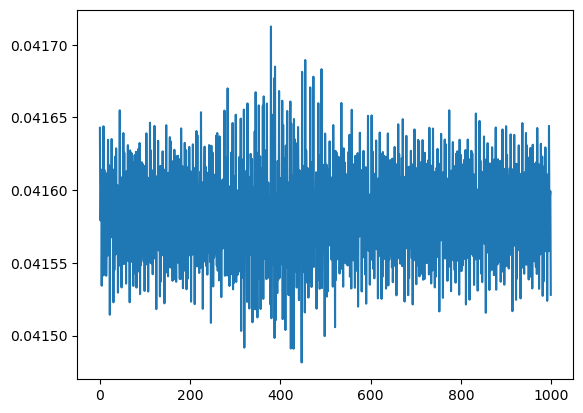

In [48]:
plt.plot(a_data[:,9])

We now have our setup! We can visualize the irregular satellites in three dimensions by zooming in on the planet in $\texttt{OrbitPlotSet}$.

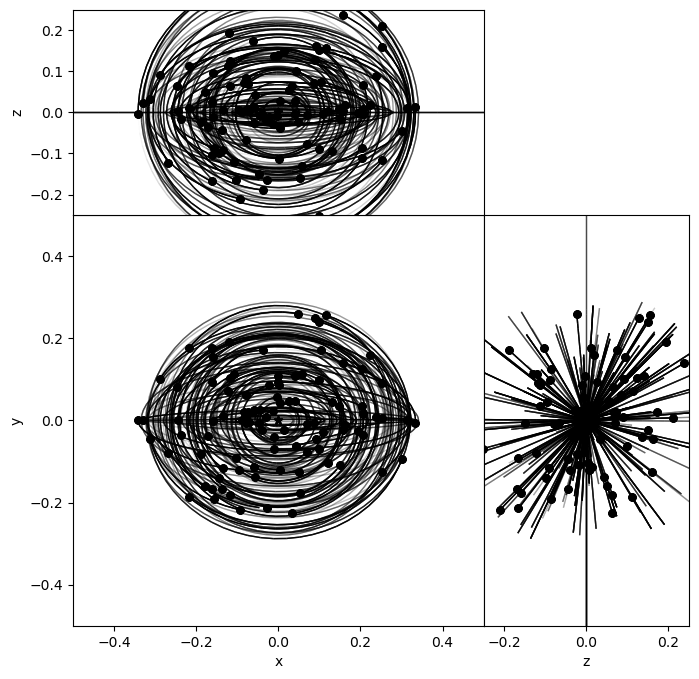

In [5]:
fig = rebound.OrbitPlotSet(sim, xlim=[-.5,.5], ylim=[-.5,.5], figsize=(8,8))

Next steps:
- Integrate over some amount of time
- See which satellites leave the Hill sphere
- Make some pretty plots
- Maybe add in a sudden change in stellar mass?